In [3]:
import pandas as pd

In [4]:
# f = pd.read_csv('YOUR_SONG_DB_artist_8798_off20.csv').drop(['Unnamed: 0'], axis=1)
# pd.concat([f,x],axis=0).drop_duplicates(subset=['id']).to_csv('mine.csv', index=False)

In [5]:
a = pd.read_csv('../songs_csv/jan.csv')
b = pd.read_csv('../songs_csv/willis.csv')

x = pd.read_csv('../songs_csv/mine.csv')

drop_if = [
    'danceability', 'energy', 'loudness', 'mode', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'
    ]
all = pd.concat([a,b,x],axis=0).drop_duplicates(subset=['id']).dropna(subset=drop_if)

# shuffle the df and reset its index
all = all.sample(frac=1).reset_index(drop=True)

display(all)
# all.isna().sum()

,track_name,artist,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,preview
0,Fire On Wheels,Kip Moore,2EuSpBqoWsE5ohMBCXXUHO,0.707,0.865,7.0,-4.594,1.0,0.0379,0.018700,...,0.820,120.004,audio_features,2EuSpBqoWsE5ohMBCXXUHO,spotify:track:2EuSpBqoWsE5ohMBCXXUHO,https://api.spotify.com/v1/tracks/2EuSpBqoWsE5...,https://api.spotify.com/v1/audio-analysis/2EuS...,156973.0,4.0,NaN
1,We All Come from the Goddess,Libana,2Qc0dihzaAGXus0OWKs6s3,0.283,0.028,2.0,-23.166,1.0,0.0547,0.992000,...,0.147,141.450,audio_features,2Qc0dihzaAGXus0OWKs6s3,spotify:track:2Qc0dihzaAGXus0OWKs6s3,https://api.spotify.com/v1/tracks/2Qc0dihzaAGX...,https://api.spotify.com/v1/audio-analysis/2Qc0...,183600.0,4.0,https://p.scdn.co/mp3-preview/9074725ec31bedc5...
2,Whisper In Ya Ear,Poppa Joe,7DrvP6aVWAA6FJlvkRQ8k8,0.540,0.570,11.0,-10.741,0.0,0.1520,0.588000,...,0.580,141.973,audio_features,7DrvP6aVWAA6FJlvkRQ8k8,spotify:track:7DrvP6aVWAA6FJlvkRQ8k8,https://api.spotify.com/v1/tracks/7DrvP6aVWAA6...,https://api.spotify.com/v1/audio-analysis/7Drv...,199133.0,4.0,https://p.scdn.co/mp3-preview/7728aef5ea2754d1...
3,Death Dance,Sevendust,46F4PTfODcLma9gb87yPlf,0.547,0.890,0.0,-2.279,0.0,0.0532,0.000032,...,0.422,116.084,audio_features,46F4PTfODcLma9gb87yPlf,spotify:track:46F4PTfODcLma9gb87yPlf,https://api.spotify.com/v1/tracks/46F4PTfODcLm...,https://api.spotify.com/v1/audio-analysis/46F4...,219360.0,4.0,https://p.scdn.co/mp3-preview/a98a0044c1ca6985...
4,Time,Mikky Ekko,2cyTXelFvE7WjSAj8U5vvb,0.477,0.280,6.0,-11.747,1.0,0.0317,0.264000,...,0.149,122.363,audio_features,2cyTXelFvE7WjSAj8U5vvb,spotify:track:2cyTXelFvE7WjSAj8U5vvb,https://api.spotify.com/v1/tracks/2cyTXelFvE7W...,https://api.spotify.com/v1/audio-analysis/2cyT...,254293.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335138,Mt. Joy,Mt. Joy,2fhxbceIBO2ShfFa7PSOj4,0.488,0.722,0.0,-6.883,1.0,0.1510,0.370000,...,0.168,126.317,audio_features,2fhxbceIBO2ShfFa7PSOj4,spotify:track:2fhxbceIBO2ShfFa7PSOj4,https://api.spotify.com/v1/tracks/2fhxbceIBO2S...,https://api.spotify.com/v1/audio-analysis/2fhx...,206853.0,4.0,https://p.scdn.co/mp3-preview/535ac1774a724e23...
335139,Some Day My Prince Will Come - Instrumental,Jack Jezzro,4OEyTY0qIv7Zk4fAFXMMt7,0.422,0.209,2.0,-15.125,1.0,0.0267,0.882000,...,0.119,88.004,audio_features,4OEyTY0qIv7Zk4fAFXMMt7,spotify:track:4OEyTY0qIv7Zk4fAFXMMt7,https://api.spotify.com/v1/tracks/4OEyTY0qIv7Z...,https://api.spotify.com/v1/audio-analysis/4OEy...,237000.0,3.0,https://p.scdn.co/mp3-preview/349bf2d77cfcf518...
335140,Cook It (feat. Fallon Williams),Cookin' On 3 Burners,4Cs2HkcT5D9xCAoy2VAp9I,0.716,0.917,3.0,-4.449,1.0,0.0927,0.333000,...,0.893,110.473,audio_features,4Cs2HkcT5D9xCAoy2VAp9I,spotify:track:4Cs2HkcT5D9xCAoy2VAp9I,https://api.spotify.com/v1/tracks/4Cs2HkcT5D9x...,https://api.spotify.com/v1/audio-analysis/4Cs2...,230067.0,4.0,NaN
335141,Maio,Mutenrohi,3TSOM2jn5WvAlvIEnYKQ66,0.682,0.647,7.0,-6.143,0.0,0.0318,0.615000,...,0.785,77.668,audio_features,3TSOM2jn5WvAlvIEnYKQ66,spotify:track:3TSOM2jn5WvAlvIEnYKQ66,https://api.spotify.com/v1/tracks/3TSOM2jn5WvA...,https://api.spotify.com/v1/audio-analysis/3TSO...,237760.0,4.0,https://p.scdn.co/mp3-preview/42e03e9354199295...


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# filter out all the numericals
nums = all.select_dtypes(include=np.number)
# time_signature & key only few values --> categorical
nums = nums.drop(['time_signature', 'key', 'mode'], axis=1)

In [8]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(nums)

# Now, all features will have the same weight.
pd.DataFrame(scaled,columns=nums.columns).head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.765554,1.026791,0.839617,-0.448269,-0.952426,-0.610943,0.103496,1.222871,-0.032537,-0.543926
1,-1.540672,-2.163739,-2.410520,-0.310251,1.845874,-0.610943,-0.631821,-1.252525,0.681781,-0.347117
2,-0.142795,-0.097709,-0.236120,0.489102,0.684348,-0.610943,2.574352,0.340114,0.699201,-0.232308
3,-0.104720,1.122088,1.244747,-0.322574,-1.006099,-0.489580,-0.830796,-0.241034,-0.163103,-0.082803
4,-0.485465,-1.203149,-0.412172,-0.499204,-0.247173,-0.610943,-0.502339,-1.245169,0.046036,0.175398


In [9]:
nums.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,335143.000000,335143.000000,335143.000000,335143.000000,335143.000000,335143.000000,335143.000000,335143.000000,335143.000000,3.351430e+05
mean,0.566253,0.595633,-9.391759,0.092465,0.349971,0.211429,0.196575,0.487531,120.980852,2.305628e+05
std,0.183850,0.262339,5.714229,0.121724,0.347819,0.346071,0.168363,0.271876,30.023093,1.352939e+05
min,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.116000e+03
25%,0.449000,0.408000,-11.522500,0.035800,0.025700,0.000000,0.095900,0.262000,97.999000,1.726000e+05
50%,0.585000,0.632000,-7.889000,0.048300,0.215000,0.000345,0.126000,0.483000,120.041000,2.119520e+05
75%,0.703000,0.815000,-5.594000,0.088200,0.671000,0.351000,0.249000,0.711000,139.950000,2.611375e+05
max,0.998000,1.000000,4.637000,0.969000,0.996000,1.000000,1.000000,1.000000,248.165000,5.707102e+06


In [10]:
nums.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

# Clustering:

In [11]:
from sklearn import cluster
import pickle

Done: 2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

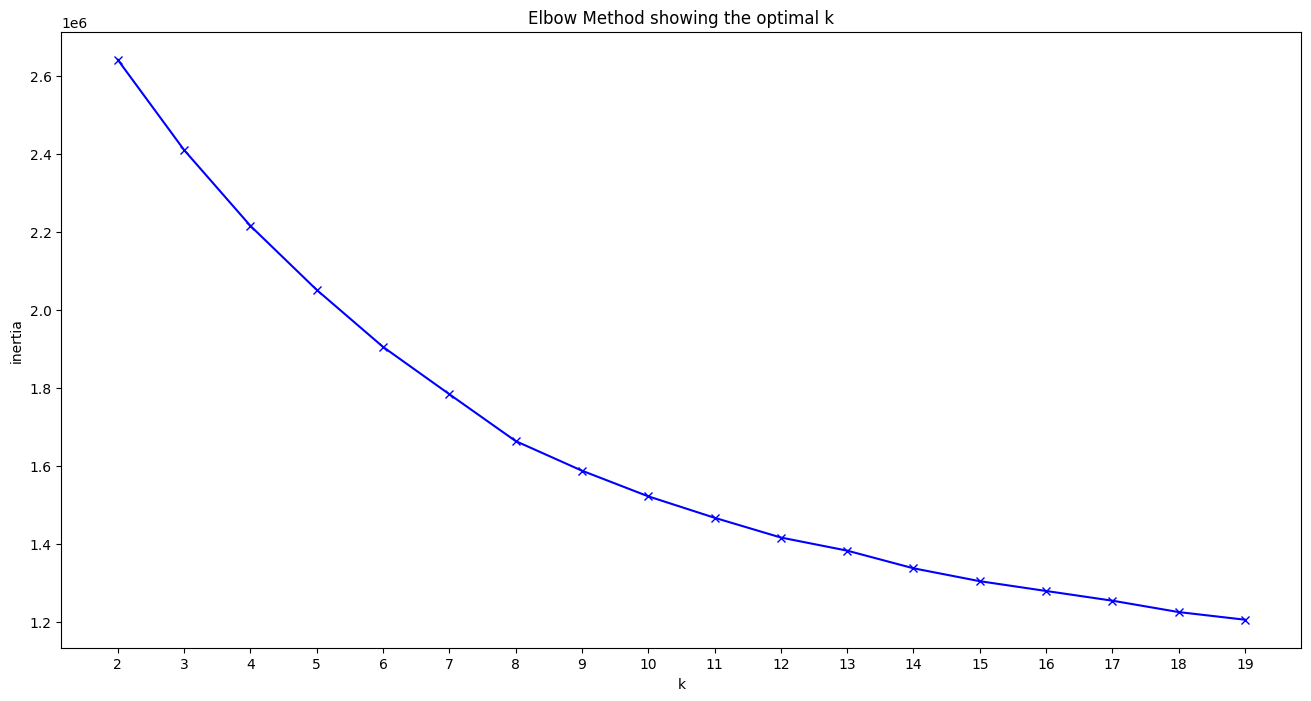

In [53]:
%matplotlib inline

K = range(2, 20)
inertia = []

print('Done: ', end='')
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled)
    print(k, ',', end='')
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Done: 2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,

Text(0.5, 1.0, 'Silhouette score showing the optimal k')

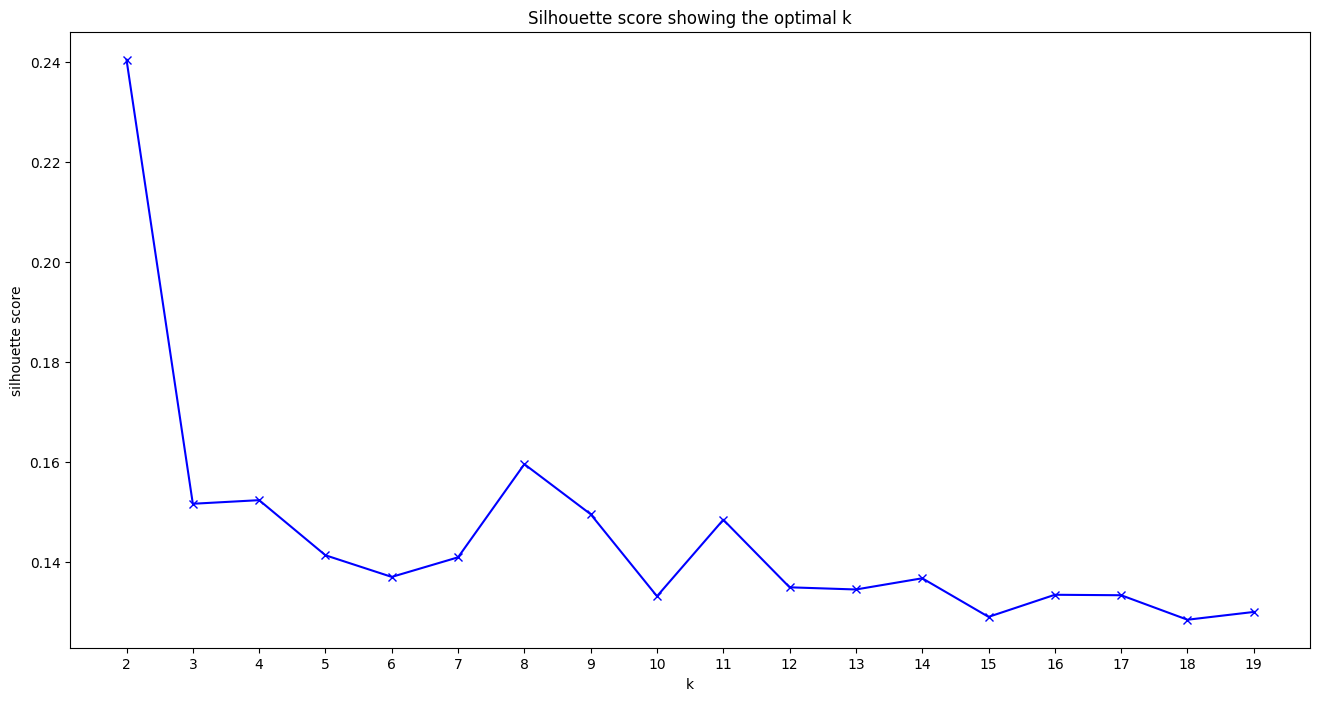

In [30]:
# doesnt finish on whole dataframe
%matplotlib inline

from sklearn.metrics import silhouette_score

K = range(2, 20)
silhouette = []

print('Done: ', end='')
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled[:50000])
    print(k, ',', end='')
    silhouette.append(silhouette_score(scaled[:50000], kmeans.predict(scaled)[:50000]))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')

In [60]:
# not a real elbow but kinda AND biggest silhouette score: 8  (11)

kkk = 8

In [61]:
kmeans = cluster.KMeans(n_clusters=kkk)
kmeans.fit(scaled)
pred_kmeans = kmeans.predict(scaled)

In [62]:
pickle.dump(kmeans, open(f'../models/Kmeans_{kkk}.sav', 'wb'))

In [ ]:
agglo = cluster.AgglomerativeClustering(n_clusters=kkk, linkage='single')

# 25 minutes

In [24]:
pred_agglo = agglo.fit_predict(scaled)

# 25 minutes again

# not good results, mostly one cluster only.... thanks agglo!

# PCA

In [15]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled)

PCA()

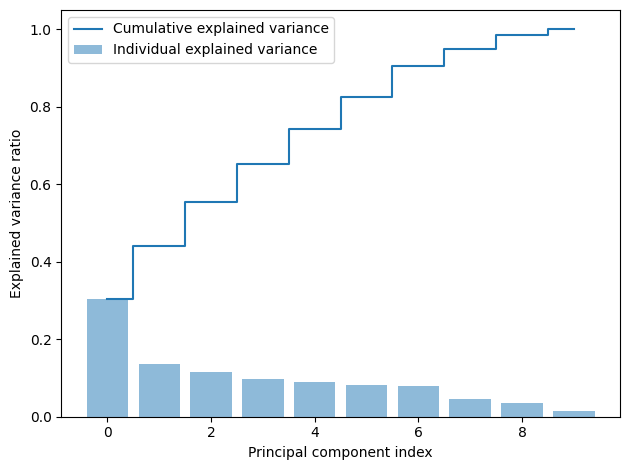

In [49]:
%matplotlib inline

exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#cum_sum_eigenvalues

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# maybe 6/7 but thats not that much of a difference to 10

In [16]:
pca = PCA(6)
pca.fit(scaled)

scaled_pca = pca.transform(scaled)

kmeans_pca = cluster.KMeans(n_clusters=kkk)
kmeans_pca.fit(scaled_pca)
pred_kmeans_pca = kmeans_pca.predict(scaled_pca)

pickle.dump(kmeans, open('../models/Kmeans_8_pca_6.sav', 'wb'))

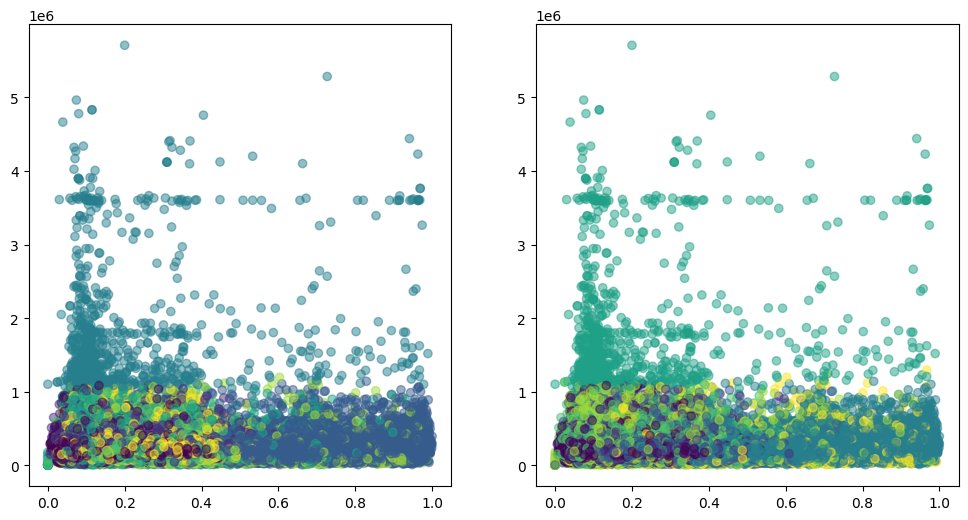

In [110]:
# 2D views:

%matplotlib inline

options, charts = plt.subplots(1, 2, figsize=(12, 6))
charts[0].scatter(all['liveness'], all['duration_ms'], c=pred_kmeans, alpha=0.5)
charts[1].scatter(all['liveness'], all['duration_ms'], c=pred_kmeans_pca, alpha=0.5)
plt.show()

In [17]:
def plot_3_features(data:pd.DataFrame, features:list, preds, size):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    x, y, z = features
    print(x,y,z)
    ax.scatter(data[x][:size], data[y][:size], data[z][:size], c=preds[:size])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    
    plt.show()

In [18]:
import itertools
import random

perms = list(itertools.permutations(nums.columns, 3))
random.shuffle(perms)

instrumentalness valence loudness


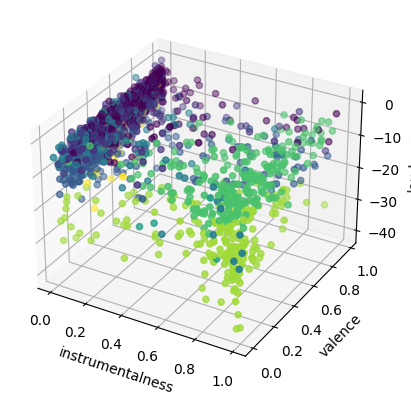

In [117]:
# non-interactive 3D viewer:

%matplotlib inline

randy = random.randint(0,len(perms)-1)
plot_3_features(all, perms[randy], pred_kmeans_pca, 2000)

In [81]:
# interactive 3D viewer:

%matplotlib qt

randy = random.randint(0,len(perms)-1)
plot_3_features(all, perms[randy], pred_kmeans_pca, 2000)

acousticness energy loudness
